# Importing all the needed Libraries

In [185]:
'''Importing Numpy and Pandas'''
import numpy as np 
import pandas as pd 

'''Machine Learning Packages'''
from sklearn.cross_validation import cross_val_predict, cross_val_score 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,ElasticNetCV, LassoCV, RidgeCV , Ridge, Lasso, LassoLarsIC,  ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, RFE, RFECV, SelectPercentile
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectPercentile, SelectKBest
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from scipy import stats
from scipy.stats import norm, skew 



'''Preprocessing Packages'''
from sklearn.preprocessing import StandardScaler, Imputer, PolynomialFeatures,Binarizer, OneHotEncoder, LabelEncoder


'''Plotting Packages'''
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 




In [186]:
'''Intiatiating Standard Scaler'''
ss = StandardScaler()

# Loading the Test and the Train Datasets

In [187]:
'''Loading the CSV into the training and the testing dataframe'''
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

In [188]:
'''Replacing the spaces in the column names with the _'''
train_raw.columns = train_raw.columns.str.replace(' ', '')
test_raw.columns = test_raw.columns.str.replace(' ', '')

# Preliminary Data Analysis

In [189]:
'''Validating the training dataset'''
train_raw.head(2)

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000


In [190]:
'''Validating the test dataset'''
test_raw.head(2)

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [191]:
'''Adding a source column in the training dataset'''

train_raw['source'] = 'Train'
train_raw.head(2)

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,3,2010,WD,Normal,130500,Train
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,4,2009,WD,Normal,220000,Train


In [192]:
'''Adding a source column in the test dataset'''

test_raw['source'] = 'Test'
test_raw.head(2)

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,source
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Test
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,Test


# Data Conversion

In [193]:
'''Converting MSSubClass, OverallCond, Year Sold, Month Sold to String'''

train_raw['MSSubClass'] = train_raw['MSSubClass'].astype(str)
test_raw['MSSubClass'] = test_raw['MSSubClass'].astype(str)


train_raw['OverallCond'] = train_raw['OverallCond'].astype(str)
test_raw['OverallCond'] = test_raw['OverallCond'].astype(str)

train_raw['YrSold'] = train_raw['YrSold'].astype(str)
test_raw['YrSold'] = test_raw['YrSold'].astype(str)

train_raw['MoSold'] = train_raw['MoSold'].astype(str)
test_raw['MoSold'] = test_raw['MoSold'].astype(str)

In [194]:
'''Merging the Training and the Test Dataset before creating the dummies'''
train_test_merged = train_raw.append(test_raw)
train_test_merged.head(2)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemod/Add,YrSold,source
0,725,754,0,NaN,3,1Fam,TA,No,533.0,0.0,...,0,Pave,6,725.0,AllPub,0,1976,2005,2010,Train
1,913,1209,0,NaN,4,1Fam,TA,No,637.0,0.0,...,0,Pave,8,913.0,AllPub,0,1996,1997,2009,Train


In [195]:
'''
Validating the count of the Train and Test Records in the Merged Dataframe 
Note: This column was added manually to deal with the mutually exclusive class categories in the training and the test dataset
'''
train_test_merged.source.value_counts()

Train    2051
Test      879
Name: source, dtype: int64

In [196]:
'''Transforming the SaleCondition'''
train_test_merged['SaleCondition'] = train_test_merged['SaleCondition'].apply(lambda x: 1 if x =='Abnorml' else 0)

# Shape Validation

In [197]:
'''Validating the Raw Shape of the Training, Test and the Merged Dataframes'''

print ('Training Shape: ', train_raw.shape)
print ('Testing Shape: ', test_raw.shape)
print ('Merge Shape: ', train_test_merged.shape)

Training Shape:  (2051, 83)
Testing Shape:  (879, 81)
Merge Shape:  (2930, 83)


# Reviewing the list of non-null columns in the dataset

In [198]:
train_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 83 columns):
1stFlrSF         2930 non-null int64
2ndFlrSF         2930 non-null int64
3SsnPorch        2930 non-null int64
Alley            198 non-null object
BedroomAbvGr     2930 non-null int64
BldgType         2930 non-null object
BsmtCond         2850 non-null object
BsmtExposure     2847 non-null object
BsmtFinSF1       2929 non-null float64
BsmtFinSF2       2929 non-null float64
BsmtFinType1     2850 non-null object
BsmtFinType2     2849 non-null object
BsmtFullBath     2928 non-null float64
BsmtHalfBath     2928 non-null float64
BsmtQual         2850 non-null object
BsmtUnfSF        2929 non-null float64
CentralAir       2930 non-null object
Condition1       2930 non-null object
Condition2       2930 non-null object
Electrical       2929 non-null object
EnclosedPorch    2930 non-null int64
ExterCond        2930 non-null object
ExterQual        2930 non-null object
Exterior1st      2930

Right away we noticed that there are handful of columns that have null values. This will require some level of handling (e.g. Imputation)

In [199]:
'''Dropping columns that have very little non-null values '''

cols_not_needed_for_regression = ['Alley', 'Fence', 'PoolQC', 'MiscFeature']
train_test_merged.drop(cols_not_needed_for_regression,axis = 1, inplace=True)

# Initial Review of the Correlation of the predictor variables with the Target Variables

In [200]:
'''Code below looks at the correlation of the individual predictor variables with the target variables, and also lists out the predictors that have a positive correlation with the target variables'''

traindata_corr = train_raw.corr()['SalePrice'][:-1]
positively_corelated = traindata_corr[traindata_corr.sort_values(ascending=False)>0]
positively_corelated_columns= list(positively_corelated.index)
positively_corelated_columns

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemod/Add',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea']

# List of Predictors that have a high level of correlation with the target Variables

In [201]:
positively_corelated.sort_values(ascending=False)

OverallQual      0.800207
GrLivArea        0.697038
GarageArea       0.650270
GarageCars       0.648220
TotalBsmtSF      0.628925
1stFlrSF         0.618486
YearBuilt        0.571849
YearRemod/Add    0.550370
FullBath         0.537969
GarageYrBlt      0.533922
MasVnrArea       0.512230
TotRmsAbvGrd     0.504014
Fireplaces       0.471093
BsmtFinSF1       0.423519
LotFrontage      0.341842
OpenPorchSF      0.333476
WoodDeckSF       0.326490
LotArea          0.296566
BsmtFullBath     0.283662
HalfBath         0.283001
2ndFlrSF         0.248452
BsmtUnfSF        0.190210
BedroomAbvGr     0.137067
ScreenPorch      0.134581
3SsnPorch        0.048732
PoolArea         0.023106
BsmtFinSF2       0.016255
Name: SalePrice, dtype: float64

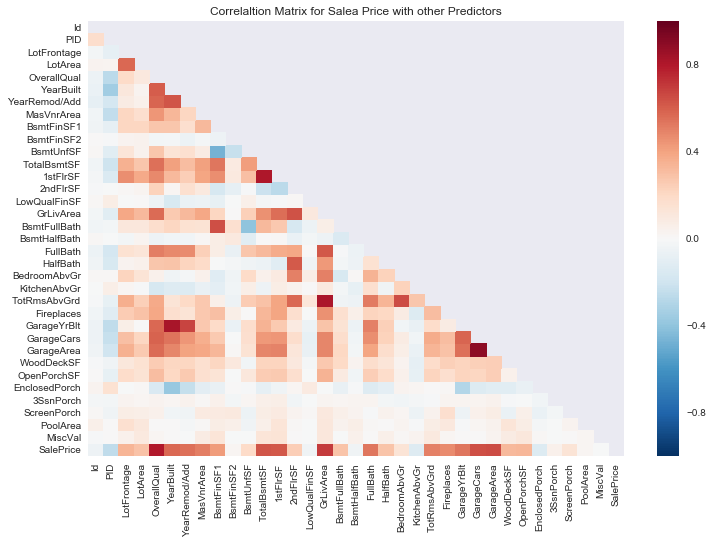

In [202]:
plt.figure(figsize=(12,8))

mask = np.zeros_like(train_raw.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train_raw.corr(), mask = mask)
plt.title('Correlaltion Matrix for Salea Price with other Predictors')

Based on quick review, we see that the SalePrice is highly correlated to OverallQual and GrLivArea. As a part of the EDA, we are also going to review this phenomenon with some scatter plots

# List of Predictors which are negatively Correlated

In [203]:
negatively_correlated = traindata_corr[traindata_corr.sort_values(ascending=False)<=0]
negatively_correlated_columns= list(negatively_correlated.index)
negatively_correlated_columns

['Id',
 'PID',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 'MiscVal']

# Reviewing the negatively correlated coefficients

In [204]:
traindata_corr[traindata_corr.sort_values(ascending=False)<=0]

Id              -0.051398
PID             -0.255052
LowQualFinSF    -0.041594
BsmtHalfBath    -0.045328
KitchenAbvGr    -0.125444
EnclosedPorch   -0.135656
MiscVal         -0.007375
Name: SalePrice, dtype: float64

# Performing some basic EDA on the SalePrice 

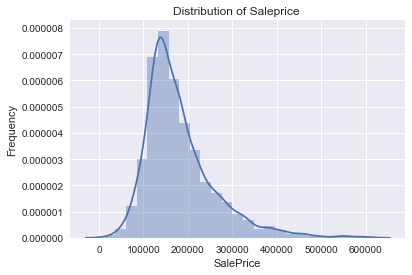

In [205]:
sns.distplot(train_raw['SalePrice'], bins=25)
plt.ylabel('Frequency')
plt.title('Distribution of Saleprice ')

We see the the plot of skewed to the left. Hence we might be better of taking the log of the salesprice in our analysis.It will also normalize the curve

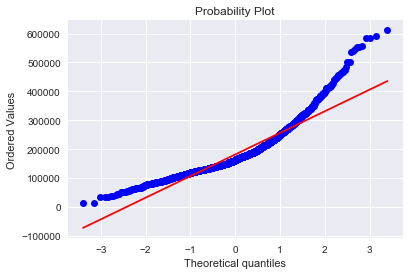

In [206]:
'''Plotting a probability plot to review the plot of SalePrice'''

fig = plt.figure()
res = stats.probplot(train_raw['SalePrice'], plot=plt)
plt.show()

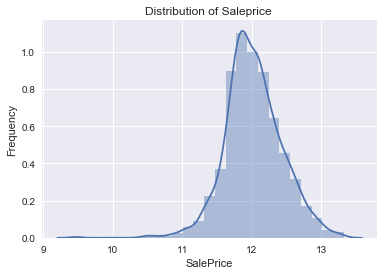

In [207]:
'''Plotting the Distplot for Salesprice using the log values'''

sns.distplot(np.log1p(train_raw['SalePrice']), bins=25)
plt.ylabel('Frequency')
plt.title('Distribution of Saleprice ')

# Scatter Plot:  "OverallQual" and "SalesPrice"

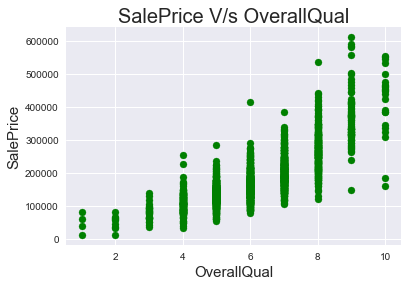

In [208]:
fig, ax = plt.subplots()
ax.scatter(x = train_raw['OverallQual'], y = train_raw['SalePrice'], color='g')
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('OverallQual', fontsize=15)
plt.title('SalePrice V/s OverallQual', fontsize = 20)
plt.show()

# Scatter plot: "GrLivArea" v/s "SalesPrice

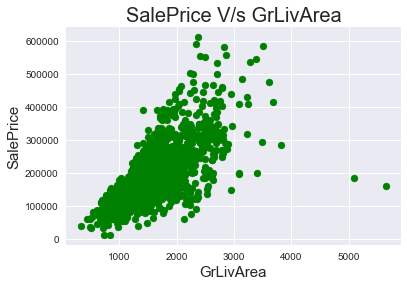

In [209]:
fig, ax = plt.subplots()
ax.scatter(x = train_raw['GrLivArea'], y = train_raw['SalePrice'], color='g')
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.title('SalePrice V/s GrLivArea', fontsize = 20)
plt.show()

In the plot above we see that there are two values where GrLivArea is greater than 5000 but the sale price is very low. These looks like outliers. For the purposes of this analysis we are going to delete this data

In [210]:
'''Deleting the Outlier Data'''

train_test_merged = train_test_merged.drop(train_test_merged[(train_test_merged['GrLivArea']>4000) & (train_test_merged['SalePrice']<300000)].index)

# Column Processing

In [211]:
'''Dropping columns that have negative correlations '''

train_test_merged.drop(negatively_correlated_columns,axis = 1, inplace=True)

This step is necessary to confirm/validate that all the data manipulations has not convulated the dataset. We notice that, the test dataset has two columns less. This is because the test dataset does not contain the SalePrice and the SaleCondition

# List of Null Columns

In [212]:
'''Retrieving the list of null columns from the merged Dataset'''

null_col_list = list(train_test_merged.columns[train_test_merged.isnull().sum()>0])
null_col_list

['BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtQual',
 'BsmtUnfSF',
 'Electrical',
 'FireplaceQu',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'MasVnrType',
 'SalePrice',
 'TotalBsmtSF']

# Total Count of Null Columns

In [213]:
'''Getting the count of total number of null columns'''
print ('Number of Null Columns: ', len(null_col_list))

Number of Null Columns:  23


# Total Count of Numeric and Non-Numeric Columns

In [214]:
# '''This step is to count the number of the Numeric and Non-Numeric columns'''
# object_col_count = 0 
# numeric_col_count = 0 


# for col_type in train_test_merged.dtypes: 
#     if col_type ==np.object: 
#         object_col_count += 1 
#     elif col_type == np.int64 or col_type == np.float64: 
#         numeric_col_count += 1
#     else: 
#         continue

# print ('Object Col Count: ', object_col_count)
# print ('Numberic Col Count: ', numeric_col_count)

In [215]:
object_col_list = []
numeric_col_list = [] 


for k,v in enumerate(train_test_merged.dtypes):
    if v == np.object: 
        object_col_list.append(train_test_merged.columns[k])
    else: 
        numeric_col_list.append(train_test_merged.columns[k])

print ('Columns of type Object:\n\n',  object_col_list)
print ('\n')
print ('Number of Object Columns: ', len(object_col_list))
print ('\n')
print ('Columns of type Int or Float:\n\n',  numeric_col_list)
print ('\n')
print ('Number of Numeric Columns: ', len(numeric_col_list))

Columns of type Object:

 ['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MoSold', 'Neighborhood', 'OverallCond', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleType', 'Street', 'Utilities', 'YrSold', 'source']


Number of Object Columns:  43


Columns of type Int or Float:

 ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtUnfSF', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallQual', 'PoolArea', 'SaleCondition', 'SalePrice', 'ScreenPorch

# Null Columns in the Merged Dataframe 

In [216]:
'''Reviewing the null columns types in the merged dataset'''
train_test_merged[null_col_list].dtypes

BsmtCond         object
BsmtExposure     object
BsmtFinSF1      float64
BsmtFinSF2      float64
BsmtFinType1     object
BsmtFinType2     object
BsmtFullBath    float64
BsmtQual         object
BsmtUnfSF       float64
Electrical       object
FireplaceQu      object
GarageArea      float64
GarageCars      float64
GarageCond       object
GarageFinish     object
GarageQual       object
GarageType       object
GarageYrBlt     float64
LotFrontage     float64
MasVnrArea      float64
MasVnrType       object
SalePrice       float64
TotalBsmtSF     float64
dtype: object

# Function for the Categorical Imputer

In [217]:
'''Function to impute the categorical columns with the Most Frequent Values'''

def categorical_imputer(col):
    print ('Null Count in ', '"',  cols ,'"',  'column Pre Transform: ' , train_test_merged[col].isnull().sum())
    
    '''Code to Impute the Mode of the Categorical Variable'''
    train_test_merged[col].fillna(value = train_test_merged[col].value_counts().index[0], inplace=True)
    
#     '''Code to Impute the Value as None (Added this line while testing the model)'''
#     train_test_merged[col].fillna(value = "None", inplace=True)
    
    
    print ('Null Count in ', '"',  cols ,'"',  'column Post Transform: ' , train_test_merged[col].isnull().sum())
    print ('\n')
    

In [218]:
'''Using the for loop on the null columns and imputing the object columns with the most frequent value'''

for cols in null_col_list: 
    if train_test_merged[cols].dtypes == 'object': 
        categorical_imputer(cols)

Null Count in  " BsmtCond " column Pre Transform:  80
Null Count in  " BsmtCond " column Post Transform:  0


Null Count in  " BsmtExposure " column Pre Transform:  83
Null Count in  " BsmtExposure " column Post Transform:  0


Null Count in  " BsmtFinType1 " column Pre Transform:  80
Null Count in  " BsmtFinType1 " column Post Transform:  0


Null Count in  " BsmtFinType2 " column Pre Transform:  81
Null Count in  " BsmtFinType2 " column Post Transform:  0


Null Count in  " BsmtQual " column Pre Transform:  80
Null Count in  " BsmtQual " column Post Transform:  0


Null Count in  " Electrical " column Pre Transform:  1
Null Count in  " Electrical " column Post Transform:  0


Null Count in  " FireplaceQu " column Pre Transform:  1422
Null Count in  " FireplaceQu " column Post Transform:  0


Null Count in  " GarageCond " column Pre Transform:  159
Null Count in  " GarageCond " column Post Transform:  0


Null Count in  " GarageFinish " column Pre Transform:  159
Null Count in  " Gara

**The result above gives the entire list of categorical columns that were imputed using the most frequent value. e also see that the "FireplaceQu" column has a lot of null values, we might be better of leaving that value in our analysis**

In [219]:
'''Validating the remaning null columms'''

train_test_merged.columns[train_test_merged.isnull().sum()>0]

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtUnfSF', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'SalePrice',
       'TotalBsmtSF'],
      dtype='object')

**On quick review, these look like numerical columns. We are going to impute these columns in the subsequent cells using the median imputer from the Pre-Processing module**

# Creating the Dummies for the Categorical Columns

In [220]:
train_test_merge_dummies = pd.get_dummies(train_test_merged, drop_first=True)
print (train_test_merge_dummies.shape)

(2928, 276)


In [221]:
cols_to_exclude = ['PID', 'SaleCondition', 'SalePrice', 'Id', 'FireplaceQu']

In [222]:
# train_test_merged.source.value_counts()

# Setting the list of columns to be included in the Model Building

In [223]:
cols_to_include= []
for columns in list(train_test_merge_dummies.columns): 
    if columns not in cols_to_exclude: 
        cols_to_include.append(columns)
cols_to_include[0:5]

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1']

The list of columns to be included is stored in the **cols_to_include** list

# Validating the list of Null Columns in the Dummied Dataframe

In [224]:
train_test_merge_dummies.columns[train_test_merge_dummies.isnull().sum()>0]

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtUnfSF', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'SalePrice',
       'TotalBsmtSF'],
      dtype='object')

All of the columns are numerical values

# Extracting the test and training sets to build the model 

In [225]:
'''Setting up the Predictors (X) and the Target (Y) variables on the Training Set'''

X_new_training_data = train_test_merge_dummies.loc[train_test_merge_dummies['source_Train'] == 1,cols_to_include]

y_new_training_data = train_test_merge_dummies.loc[train_test_merge_dummies['source_Train'] == 1,'SaleCondition']

#'''Using the log value in our model. We shall do the translation while predicting the final values'''
# y_new_training_data = np.log1p(y_new_training_data_mod)

X_train, X_test, y_train, y_test = train_test_split(X_new_training_data, y_new_training_data, test_size=0.2)

X_new_training_data = X_train
y_new_training_data = y_train

In [226]:
'''Setting up the predictors (X) on the Test Set'''

X_new_test_data = train_test_merge_dummies.loc[train_test_merge_dummies['source_Train'] == 0,cols_to_include]

In [227]:
# X_new_training_data.drop(['GarageYrBlt', 'LotFrontage', 'MasVnrArea','Id'], axis=1, inplace=True)

In [228]:
# X_new_test_data.drop(['GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'Id'], axis=1, inplace=True)

# Checking the Shape of the Datasets

In [229]:
print (X_new_training_data.shape)
print (y_new_training_data.shape)
print (X_new_test_data.shape)

(1639, 274)
(1639,)
(879, 274)


# Setting up the Median Imputer

In [230]:
median_imputer = Imputer(strategy='median')

# Retrieving Count of Null Numeric Columns in the Training Set

In [231]:
'''Numeric Columns in the Training set that needs to be addressed. In other words, we are going to apply the median imputer on all the numerical columns in the training set'''

print ('Total Number of Null Numeric Columns that needs to be addressed: ', len(X_new_training_data.columns[X_new_training_data.isnull().sum()>0]))

print ('\nHere is the list: ')

X_new_training_data.columns[X_new_training_data.isnull().sum()>0]


Total Number of Null Numeric Columns that needs to be addressed:  8

Here is the list: 


Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtUnfSF', 'GarageYrBlt',
       'LotFrontage', 'MasVnrArea', 'TotalBsmtSF'],
      dtype='object')

# Getting a sense of numerical columns in the training set

In [232]:
numeric_col_list_dummies=[]
for k,v in enumerate(X_new_training_data.dtypes):
    if v == 'int64' or v == 'float64' : 
        numeric_col_list_dummies.append(X_new_training_data.columns[k])

    else: 
        continue
print (numeric_col_list_dummies)

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtUnfSF', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemod/Add']


In [233]:
# '''Imputing all the numeric colums in X_Train'''
# for cols in numeric_col_list_dummies:
#     X_new_training_data[cols] = median_imputer.fit_transform(X_new_training_data[[cols]])

# Imputing the Null Columns with the Median Values using the Imputer

In [234]:
BsmtFinSF1_fit = median_imputer.fit(X_new_training_data[['BsmtFinSF1']])
X_new_training_data['BsmtFinSF1'] = BsmtFinSF1_fit.transform(X_new_training_data[['BsmtFinSF1']])

BsmtFinSF2_fit = median_imputer.fit(X_new_training_data[['BsmtFinSF2']])
X_new_training_data['BsmtFinSF2'] = BsmtFinSF2_fit.transform(X_new_training_data[['BsmtFinSF2']])

BsmtFullBath_fit = median_imputer.fit(X_new_training_data[['BsmtFullBath']])
X_new_training_data['BsmtFullBath'] = BsmtFullBath_fit.transform(X_new_training_data[['BsmtFullBath']])

# BsmtHalfBath_fit = median_imputer.fit(X_new_training_data[['BsmtHalfBath']])
# X_new_training_data['BsmtHalfBath'] = BsmtHalfBath_fit.transform(X_new_training_data[['BsmtHalfBath']])

BsmtUnfSF_fit = median_imputer.fit(X_new_training_data[['BsmtUnfSF']])
X_new_training_data['BsmtUnfSF'] = BsmtUnfSF_fit.transform(X_new_training_data[['BsmtUnfSF']])

GarageArea_fit = median_imputer.fit(X_new_training_data[['GarageArea']])
X_new_training_data['GarageArea'] = GarageArea_fit.transform(X_new_training_data[['GarageArea']])

GarageCars_fit = median_imputer.fit(X_new_training_data[['GarageCars']])
X_new_training_data['GarageCars'] = GarageCars_fit.transform(X_new_training_data[['GarageCars']])

GarageYrBlt_fit = median_imputer.fit(X_new_training_data[['GarageYrBlt']])
X_new_training_data['GarageYrBlt'] = GarageYrBlt_fit.transform(X_new_training_data[['GarageYrBlt']])

LotFrontage_fit = median_imputer.fit(X_new_training_data[['LotFrontage']])
X_new_training_data['LotFrontage'] = LotFrontage_fit.transform(X_new_training_data[['LotFrontage']])

MasVnrArea_fit = median_imputer.fit(X_new_training_data[['MasVnrArea']])
X_new_training_data['MasVnrArea'] = MasVnrArea_fit.transform(X_new_training_data[['MasVnrArea']])

TotalBsmtSF_fit = median_imputer.fit(X_new_training_data[['TotalBsmtSF']])
X_new_training_data['TotalBsmtSF'] = TotalBsmtSF_fit.transform(X_new_training_data[['TotalBsmtSF']])


**The above imputation should probably be carried out in a loop**

In [235]:
'''Validating to see if there are any null values in the predictors within the training set'''

X_new_training_data.columns[X_new_training_data.isnull().sum()>0]

Index([], dtype='object')

In [236]:
'''Validating to see if there are any null values in the Target Variables within the training set'''

y_new_training_data.isnull().sum()

0

As expected the predictors and the targets in the dataset dont have any null values 

# Model Building and Evaluation

# Basic  Logistic Regression

In [237]:
'''Logistic Regression '''

lr = LogisticRegression()

In [238]:
'''Fitting the Model on the Training Set'''

lr.fit(X_new_training_data, y_new_training_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [239]:
'''Scoring the Model on the Training Set'''

lr.score(X_new_training_data, y_new_training_data)

0.9487492373398414

In [240]:
'''Predicting the Training Values '''

y_train_predicted = lr.predict(X_new_training_data)
y_train_predicted[0:5]

array([0, 0, 0, 0, 0])

# Applying the model on to Test Set 

#### Checking the list of null columns in the Test Set that will require imputation

In [241]:
X_new_test_data.columns[X_new_test_data.isnull().sum()>0]

Index(['GarageYrBlt', 'LotFrontage', 'MasVnrArea'], dtype='object')

The columns *'GarageYrBlt', 'LotFrontage', 'MasVnrArea'* needs imputation from the training model

In [242]:
X_new_test_data['GarageYrBlt'] = GarageYrBlt_fit.transform(X_new_test_data[['GarageYrBlt']])

X_new_test_data['LotFrontage'] = LotFrontage_fit.transform(X_new_test_data[['LotFrontage']])

X_new_test_data['MasVnrArea'] = MasVnrArea_fit.transform(X_new_test_data[['MasVnrArea']])

In [243]:
'''Performing validation to see if there are any more null values'''
X_new_test_data.columns[X_new_test_data.isnull().sum()>0]

Index([], dtype='object')

As expected after the imputation there are no more null values

# Predicting the value of the Target Variable on the Test Set

In [244]:
y_predicted = lr.predict(X_new_test_data)
y_predicted[0:5]

array([0, 0, 0, 0, 0])

In [278]:
y_train_predicted = lr.predict(X_new_training_data)

In [245]:
'''Reviewing the first five values of the Predicted set'''
y_predicted[0:5]

array([0, 0, 0, 0, 0])

In [249]:
'''Creating a Dataframe of the predicted values. This will be used to create the CSV file'''

d = {'Id': test_raw['Id'], 'Sale Condition': y_predicted}
predicted_df= pd.DataFrame(d)
predicted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 2 columns):
Id                879 non-null int64
Sale Condition    879 non-null int64
dtypes: int64(2)
memory usage: 13.8 KB


## CSV File Creation with the Basic Model

In [250]:
predicted_df.to_csv('ac_basic_predictions_classification.csv', index=False)

Since we had good model performance using the GradientBoost approach with the regression challenge. We are going to use the GradientBoostClassifier for this classification challenge

In [279]:
'''Model Performance - Confusion Matrix'''
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_new_training_data, y_train_predicted)
cm

array([[1525,    5],
       [  79,   30]])

The model peformance is good

In [280]:
'''Validating the Score with the Model Score'''
from sklearn import metrics
print (metrics.accuracy_score(y_train_predicted, y_new_training_data))

0.94874923734


# Gradient Boost

In [254]:

gb = GradientBoostingClassifier()
gb_params = {
#     'n_estimators': [11000],
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'max_features': [4,6,8,10,100,'sqrt']
}
gb_model = GridSearchCV(gb, param_grid=gb_params)
gb_model.fit(X_new_training_data, y_new_training_data)
print('best score', gb_model.best_score_)
print('best params', gb_model.best_params_)
print('test score', gb_model.score(X_new_training_data, y_new_training_data))

best score 0.935326418548
best params {'max_depth': 5, 'max_features': 8}
test score 0.978035387431


In [271]:
GBest = GradientBoostingClassifier(n_estimators=3000, learning_rate=0.1, max_depth=6, max_features=30,
                                               min_samples_leaf=8, min_samples_split=6, loss='deviance')


In [272]:
GBest.fit(X_new_training_data, y_new_training_data)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=30, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=8,
              min_samples_split=6, min_weight_fraction_leaf=0.0,
              n_estimators=3000, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [273]:
GBest.score(X_new_training_data, y_new_training_data)

1.0

In [274]:
y_gb_train_predict = GBest.predict(X_new_training_data)
y_gb_test_predict = GBest.predict(X_new_test_data)

d = {'Id': test_raw['Id'], 'Sale Condition': y_gb_test_predict}
predicted_df= pd.DataFrame(d)
predicted_df.info()

predicted_df.to_csv('ac_gb__classification_predictions.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 2 columns):
Id                879 non-null int64
Sale Condition    879 non-null int64
dtypes: int64(2)
memory usage: 13.8 KB


In [275]:
'''Model Performance - Confusion Matrix'''
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_new_training_data, y_gb_train_predict)
cm

array([[1530,    0],
       [   0,  109]])

The model seems to be overfitting

In [276]:
'''Validating the Score with the Model Score'''
from sklearn import metrics
print (metrics.accuracy_score(y_gb_train_predict, y_new_training_data))

1.0
